In [1]:
import featuretools as ft
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

In [5]:
s=pd.Series([1,2,3,4,np.nan,6,8])
s

0    1.0
1    2.0
2    3.0
3    4.0
4    NaN
5    6.0
6    8.0
dtype: float64

In [10]:
df=pd.DataFrame(np.random.randn(8,4),columns=list('ABCD'))

In [11]:
df.sort_values(by='D')

,A,B,C,D
6,2.317704,-1.164482,-0.383643,-1.143960
5,0.224676,-0.648735,0.235947,-0.581129
1,0.272532,-0.007497,0.352028,-0.368896
3,-0.284213,-1.017530,1.123600,0.029978
2,-1.239481,0.673645,0.936915,0.209356
0,-1.992463,0.911775,0.652998,0.404388
4,1.456954,1.659975,0.494281,1.094329
7,1.478231,0.478514,-0.614713,1.605244


In [51]:
df['D']

2013-01-01   -0.937184
2013-01-02    0.431984
2013-01-03   -0.781487
2013-01-04   -1.913551
2013-01-05   -1.156722
2013-01-06   -0.245842
Freq: D, Name: D, dtype: float64

In [12]:
df.drop('C',axis=1)

,A,B,D
0,-1.992463,0.911775,0.404388
1,0.272532,-0.007497,-0.368896
2,-1.239481,0.673645,0.209356
3,-0.284213,-1.017530,0.029978
4,1.456954,1.659975,1.094329
5,0.224676,-0.648735,-0.581129
6,2.317704,-1.164482,-1.143960
7,1.478231,0.478514,1.605244


In [14]:
df=df.copy()
df['C']=('data','mining','framework','light','weight','IDE','Ana','Conda')
df

,A,B,C,D
0,-1.992463,0.911775,data,0.404388
1,0.272532,-0.007497,mining,-0.368896
2,-1.239481,0.673645,framework,0.209356
3,-0.284213,-1.017530,light,0.029978
4,1.456954,1.659975,weight,1.094329
5,0.224676,-0.648735,IDE,-0.581129
6,2.317704,-1.164482,Ana,-1.143960
7,1.478231,0.478514,Conda,1.605244


In [54]:
df[0:2]

,A,B,C,D
2013-01-01,2.730442,-0.636885,-0.786880,-0.937184
2013-01-02,-0.960872,-0.101668,-1.707465,0.431984


In [56]:
df.loc[dates[1]]

A   -0.960872
B   -0.101668
C   -1.707465
D    0.431984
Name: 2013-01-02 00:00:00, dtype: float64

In [61]:
df.loc[:,['A','C']]

,A,C
2013-01-01,2.730442,-0.786880
2013-01-02,-0.960872,-1.707465
2013-01-03,-0.822741,0.219208
2013-01-04,-0.801082,-1.119815
2013-01-05,-1.464559,0.304455
2013-01-06,0.872032,0.061740


In [63]:
df.loc['2013-01-01':'2013-01-02',['A','C']]

,A,C
2013-01-01,2.730442,-0.786880
2013-01-02,-0.960872,-1.707465


In [68]:
df.at[dates[0],'A']

2.730442047042125

In [75]:
df.iloc[3:5,0:4]

,A,B,C,D
2013-01-04,-0.801082,-0.192059,-1.119815,-1.913551
2013-01-05,-1.464559,1.009232,0.304455,-1.156722


In [77]:
df.iloc[[0,1,2],[0,1,2]]

,A,B,C
2013-01-01,2.730442,-0.636885,-0.786880
2013-01-02,-0.960872,-0.101668,-1.707465
2013-01-03,-0.822741,-1.793649,0.219208


In [78]:
df.iloc[[4,5],[2,3]]

,C,D
2013-01-05,0.304455,-1.156722
2013-01-06,0.061740,-0.245842


In [79]:
df[df.A>0]

,A,B,C,D
2013-01-01,2.730442,-0.636885,-0.78688,-0.937184
2013-01-06,0.872032,-0.512948,0.06174,-0.245842


In [80]:
df[df>0]

,A,B,C,D
2013-01-01,2.730442,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,0.431984
2013-01-03,NaN,NaN,0.219208,NaN
2013-01-04,NaN,NaN,NaN,NaN
2013-01-05,NaN,1.009232,0.304455,NaN
2013-01-06,0.872032,NaN,0.061740,NaN


In [84]:
df1=df.copy()
df1['E']=['liquid','ben','ludique','works','Unity','GDC']

In [85]:
df1

,A,B,C,D,E
2013-01-01,2.730442,-0.636885,-0.786880,-0.937184,liquid
2013-01-02,-0.960872,-0.101668,-1.707465,0.431984,ben
2013-01-03,-0.822741,-1.793649,0.219208,-0.781487,ludique
2013-01-04,-0.801082,-0.192059,-1.119815,-1.913551,works
2013-01-05,-1.464559,1.009232,0.304455,-1.156722,Unity
2013-01-06,0.872032,-0.512948,0.061740,-0.245842,GDC


In [87]:
df1[df1['E'].isin(['works','GDC'])]

,A,B,C,D,E
2013-01-04,-0.801082,-0.192059,-1.119815,-1.913551,works
2013-01-06,0.872032,-0.512948,0.061740,-0.245842,GDC


In [93]:
s1= pd.Series([1,2,3,4,5,6], index=pd.date_range('20130102',periods=6))

In [94]:
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [99]:
df1

,A,B,C,D,E
2013-01-01,2.730442,-0.636885,-0.786880,-0.937184,liquid
2013-01-02,-0.960872,-0.101668,-1.707465,0.431984,ben
2013-01-03,-0.822741,-1.793649,0.219208,-0.781487,ludique
2013-01-04,-0.801082,-0.192059,-1.119815,-1.913551,works
2013-01-05,-1.464559,1.009232,0.304455,-1.156722,Unity
2013-01-06,0.872032,-0.512948,0.061740,-0.245842,GDC


In [100]:
df.loc[:,'C']=np.array([4]*len(df))

In [101]:
df

,A,B,C,D
2013-01-01,0.000000,-0.636885,4,-0.937184
2013-01-02,-0.960872,-0.101668,4,0.431984
2013-01-03,-0.822741,-1.793649,4,-0.781487
2013-01-04,-0.801082,-0.192059,4,-1.913551
2013-01-05,-1.464559,1.009232,4,-1.156722
2013-01-06,0.872032,-0.512948,4,-0.245842


In [102]:
df1=df.reindex(index=dates[0:4],columns=list(df.columns)+['E'])

In [103]:
df1.loc[dates[2]:dates[4],'B']=1700

In [106]:
df1.dropna(how='any')

,A,B,C,D,E


In [115]:
df1.loc[dates[2],'E']=3

In [112]:
df1

,A,B,C,D,E
2013-01-01,3.000000,-0.636885,4,-0.937184,3.0
2013-01-02,-0.960872,-0.101668,4,0.431984,NaN
2013-01-03,-0.822741,1700.000000,4,-0.781487,NaN
2013-01-04,-0.801082,1700.000000,4,-1.913551,NaN


In [116]:
df1.dropna(how='any')

,A,B,C,D,E
2013-01-01,3.000000,-0.636885,4,-0.937184,3.0
2013-01-03,-0.822741,1700.000000,4,-0.781487,3.0


In [117]:
df1.fillna(value=7)

,A,B,C,D,E
2013-01-01,3.000000,-0.636885,4,-0.937184,3.0
2013-01-02,-0.960872,-0.101668,4,0.431984,7.0
2013-01-03,-0.822741,1700.000000,4,-0.781487,3.0
2013-01-04,-0.801082,1700.000000,4,-1.913551,7.0


In [118]:
pd.isnull(df1)

,A,B,C,D,E
2013-01-01,False,False,False,False,False
2013-01-02,False,False,False,False,True
2013-01-03,False,False,False,False,False
2013-01-04,False,False,False,False,True


In [119]:
df1.mean()

A      0.103826
B    849.815362
C      4.000000
D     -0.800059
E      3.000000
dtype: float64

In [120]:
df1.describe()

,A,B,C,D,E
count,4.000000,4.000000,4.0,4.000000,2.0
mean,0.103826,849.815362,4.0,-0.800059,3.0
std,1.932079,981.708684,0.0,0.962105,0.0
min,-0.960872,-0.636885,4.0,-1.913551,3.0
25%,-0.857274,-0.235472,4.0,-1.181275,3.0
50%,-0.811911,849.949166,4.0,-0.859335,3.0
75%,0.149189,1700.000000,4.0,-0.478119,3.0
max,3.000000,1700.000000,4.0,0.431984,3.0


In [122]:
s=pd.Series([1,2,3,np.nan,6,8],index=dates).shift(2)
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    2.0
2013-01-05    3.0
2013-01-06    NaN
Freq: D, dtype: float64

In [123]:
df.sub(s,axis='index')

,A,B,C,D
2013-01-01,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN
2013-01-03,-1.822741,-2.793649,3.0,-1.781487
2013-01-04,-2.801082,-2.192059,2.0,-3.913551
2013-01-05,-4.464559,-1.990768,1.0,-4.156722
2013-01-06,NaN,NaN,NaN,NaN


In [124]:
df.apply(np.cumsum)

,A,B,C,D
2013-01-01,0.000000,-0.636885,4,-0.937184
2013-01-02,-0.960872,-0.738553,8,-0.505200
2013-01-03,-1.783613,-2.532202,12,-1.286686
2013-01-04,-2.584695,-2.724261,16,-3.200237
2013-01-05,-4.049254,-1.715029,20,-4.356959
2013-01-06,-3.177222,-2.227977,24,-4.602801


In [126]:
df.apply(lambda x: x.max()-x.min())

A    2.336591
B    2.802881
C    0.000000
D    2.345534
dtype: float64

In [133]:
s=pd.Series(np.random.randint(0,8,size=5))
s

0    1
1    7
2    4
3    7
4    3
dtype: int32

In [137]:
s=pd.Series(['A','Baba','CAT','CHAmp'])

In [138]:
s.str.lower()

0        a
1     baba
2      cat
3    champ
dtype: object

In [9]:
df=pd.DataFrame(np.random.randn(10,4),columns=list('BILL'))
df

,B,I,L,L
0,0.692405,-0.073442,0.670672,-0.425365
1,-1.784192,-0.881417,-2.058928,0.562283
2,-1.131872,-0.436622,-0.743833,-1.255246
3,1.028270,-1.280906,0.510760,-0.004545
4,-0.433786,0.621006,-0.358399,2.053846
5,0.065092,1.255981,0.050239,-2.155719
6,-1.334806,0.514863,-0.756988,-1.385779
7,-3.222007,-0.441353,0.531742,-1.127217
8,0.111468,-0.810581,0.770584,-1.338011
9,-1.486251,-0.389092,-0.288981,-0.479083


In [144]:
pieces=[df[:3],df[3:7],df[7:]]

In [146]:
pd.concat(pieces)

,0,1,2,3
0,-0.281817,0.020830,-0.114432,-0.826523
1,-0.482550,0.129682,-0.435154,-0.252177
2,0.442452,-0.798494,0.915050,-0.328389
3,-1.677747,0.628156,0.967802,-1.759472
4,0.156123,0.728308,-1.326864,0.200703
5,1.165473,-0.096424,-0.968340,-0.919246
6,-2.456159,0.190315,0.798728,0.098557
7,-0.585035,-0.037780,-0.832998,-0.235066
8,0.543449,-0.077845,0.580612,-0.995236
9,0.183762,1.434262,0.016667,0.259791


In [152]:
left=pd.DataFrame({'key':['fool','fool'],'lval':[1,2]})

In [167]:
right=pd.DataFrame({'key':['fool','fool'],'rval':[4,5]})

In [168]:
pd.merge(left,right,on='key')

,key,lval,rval
0,fool,1,4
1,fool,1,5
2,fool,2,4
3,fool,2,5


In [171]:
df=pd.DataFrame(np.random.randn(10,6),columns=['A','B','C','D','E','F'])
df

,A,B,C,D,E,F
0,-0.102212,0.569912,-1.535665,1.584066,0.332381,-1.886690
1,0.143704,0.182237,-0.505926,1.330469,0.549818,2.165062
2,-0.509534,0.778744,-1.381578,0.183934,-0.372318,-1.216420
3,-0.006158,-2.287048,0.167800,0.517121,-0.188312,-0.623838
4,0.127436,-0.176906,-0.267327,0.353726,-0.428047,1.146429
5,1.170929,0.941060,0.001756,-0.133071,-1.930707,-0.418314
6,1.385702,-0.433225,-0.196759,-0.127584,0.247421,-0.755874
7,-1.632144,-0.677588,0.367105,-0.722681,-0.689071,0.705933
8,-0.201127,-1.641137,0.456811,-2.046584,-0.097369,1.592466
9,2.436399,0.378866,-0.240670,0.590606,0.521088,0.185416


In [172]:
s=df.iloc[3]
s

A   -0.006158
B   -2.287048
C    0.167800
D    0.517121
E   -0.188312
F   -0.623838
Name: 3, dtype: float64

In [173]:
df.append(s,ignore_index=True)

,A,B,C,D,E,F
0,-0.102212,0.569912,-1.535665,1.584066,0.332381,-1.886690
1,0.143704,0.182237,-0.505926,1.330469,0.549818,2.165062
2,-0.509534,0.778744,-1.381578,0.183934,-0.372318,-1.216420
3,-0.006158,-2.287048,0.167800,0.517121,-0.188312,-0.623838
4,0.127436,-0.176906,-0.267327,0.353726,-0.428047,1.146429
5,1.170929,0.941060,0.001756,-0.133071,-1.930707,-0.418314
6,1.385702,-0.433225,-0.196759,-0.127584,0.247421,-0.755874
7,-1.632144,-0.677588,0.367105,-0.722681,-0.689071,0.705933
8,-0.201127,-1.641137,0.456811,-2.046584,-0.097369,1.592466
9,2.436399,0.378866,-0.240670,0.590606,0.521088,0.185416


In [176]:
df=pd.DataFrame({'A':['foo','bar','foo','bar','foo','bar','foo','bar'],
                'B':['one','one','two','three','two','two','one','three'],
                'C': np.random.randn(8),
                'D': np.random.randn(8)
                })
df

,A,B,C,D
0,foo,one,0.031187,-1.123201
1,bar,one,-0.204715,1.637618
2,foo,two,-1.095343,0.746514
3,bar,three,0.893565,-0.029465
4,foo,two,-1.312257,-0.169483
5,bar,two,0.605449,-1.679188
6,foo,one,-1.948548,-0.823063
7,bar,three,-0.603264,0.714798


In [181]:
df.groupby(['A','B']).sum()

C         D
A   B                        
bar one   -0.204715  1.637618
    three  0.290301  0.685334
    two    0.605449 -1.679188
foo one   -1.917362 -1.946265
    two   -2.407599  0.577031

In [182]:
tuples=list(zip(*['bar','bar','baz','baz','foo','foo','qux','qux'],['one','two','one','two','one','two','one','two']))


In [188]:
df2=df.stack()
df2

0  A          foo
   B          one
   C    0.0311866
   D      -1.1232
1  A          bar
   B          one
   C    -0.204715
   D      1.63762
2  A          foo
   B          two
   C     -1.09534
   D     0.746514
3  A          bar
   B        three
   C     0.893565
   D   -0.0294648
4  A          foo
   B          two
   C     -1.31226
   D    -0.169483
5  A          bar
   B          two
   C     0.605449
   D     -1.67919
6  A          foo
   B          one
   C     -1.94855
   D    -0.823063
7  A          bar
   B        three
   C    -0.603264
   D     0.714798
dtype: object

In [190]:
df=df2.unstack()
df

,A,B,C,D
0,foo,one,0.0311866,-1.1232
1,bar,one,-0.204715,1.63762
2,foo,two,-1.09534,0.746514
3,bar,three,0.893565,-0.0294648
4,foo,two,-1.31226,-0.169483
5,bar,two,0.605449,-1.67919
6,foo,one,-1.94855,-0.823063
7,bar,three,-0.603264,0.714798


In [193]:
df2=df.copy()
df2['E']=['A','B','C','D']*2
df2

,A,B,C,D,E
0,foo,one,0.0311866,-1.1232,A
1,bar,one,-0.204715,1.63762,B
2,foo,two,-1.09534,0.746514,C
3,bar,three,0.893565,-0.0294648,D
4,foo,two,-1.31226,-0.169483,A
5,bar,two,0.605449,-1.67919,B
6,foo,one,-1.94855,-0.823063,C
7,bar,three,-0.603264,0.714798,D


In [ ]:
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C']).......ERROR HERE

In [202]:
rng=pd.date_range('20120101',periods=100,freq='S')
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)

In [203]:
ts.resample('5Min',how='sum')

C:\Users\Billy Gareth\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  """Entry point for launching an IPython kernel.


2012-01-01    21875
Freq: 5T, dtype: int32

In [211]:
ts_utc=ts.tz_localize('UTC')
ts_utc

2012-01-01 00:00:00+00:00    170
2012-01-01 00:00:01+00:00    105
2012-01-01 00:00:02+00:00    334
2012-01-01 00:00:03+00:00    429
2012-01-01 00:00:04+00:00    329
                            ... 
2012-01-01 00:01:35+00:00     22
2012-01-01 00:01:36+00:00    283
2012-01-01 00:01:37+00:00     58
2012-01-01 00:01:38+00:00     15
2012-01-01 00:01:39+00:00    380
Freq: S, Length: 100, dtype: int32

In [210]:
ts_utc.tz_convert('US/Eastern')

2011-12-31 19:00:00-05:00    170
2011-12-31 19:00:01-05:00    105
2011-12-31 19:00:02-05:00    334
2011-12-31 19:00:03-05:00    429
2011-12-31 19:00:04-05:00    329
                            ... 
2011-12-31 19:01:35-05:00     22
2011-12-31 19:01:36-05:00    283
2011-12-31 19:01:37-05:00     58
2011-12-31 19:01:38-05:00     15
2011-12-31 19:01:39-05:00    380
Freq: S, Length: 100, dtype: int32

In [216]:
ps=ts.to_period()
ps

2012-01-01 00:00:00    170
2012-01-01 00:00:01    105
2012-01-01 00:00:02    334
2012-01-01 00:00:03    429
2012-01-01 00:00:04    329
                      ... 
2012-01-01 00:01:35     22
2012-01-01 00:01:36    283
2012-01-01 00:01:37     58
2012-01-01 00:01:38     15
2012-01-01 00:01:39    380
Freq: S, Length: 100, dtype: int32

In [217]:
ps.to_timestamp()

2012-01-01 00:00:00    170
2012-01-01 00:00:01    105
2012-01-01 00:00:02    334
2012-01-01 00:00:03    429
2012-01-01 00:00:04    329
                      ... 
2012-01-01 00:01:35     22
2012-01-01 00:01:36    283
2012-01-01 00:01:37     58
2012-01-01 00:01:38     15
2012-01-01 00:01:39    380
Freq: S, Length: 100, dtype: int32

In [218]:
prng = pd.period_range('1990Q1', '2000Q4', freq='Q-NOV')

In [220]:
 ts = pd.Series(np.random.randn(len(prng)), prng)

In [221]:
ts.index = (prng.asfreq('M', 'e') + 1).asfreq('H', 's') + 9 

In [222]:
ts

1990-03-01 09:00    1.229572
1990-06-01 09:00   -0.711764
1990-09-01 09:00   -0.309518
1990-12-01 09:00    0.376482
1991-03-01 09:00    0.553563
1991-06-01 09:00   -0.479105
1991-09-01 09:00   -1.440303
1991-12-01 09:00   -1.588066
1992-03-01 09:00    1.859453
1992-06-01 09:00   -0.245281
1992-09-01 09:00    0.634227
1992-12-01 09:00   -1.640788
1993-03-01 09:00   -0.244511
1993-06-01 09:00    0.940161
1993-09-01 09:00    0.546971
1993-12-01 09:00   -0.607761
1994-03-01 09:00    0.794498
1994-06-01 09:00    0.644099
1994-09-01 09:00    0.019464
1994-12-01 09:00    1.620606
1995-03-01 09:00   -0.736567
1995-06-01 09:00    0.341038
1995-09-01 09:00   -0.374502
1995-12-01 09:00   -0.427356
1996-03-01 09:00    0.989341
1996-06-01 09:00   -1.336469
1996-09-01 09:00   -0.912376
1996-12-01 09:00   -2.243918
1997-03-01 09:00   -1.100475
1997-06-01 09:00   -0.011660
1997-09-01 09:00    0.666754
1997-12-01 09:00    1.156573
1998-03-01 09:00    0.706855
1998-06-01 09:00    1.190976
1998-09-01 09:

In [3]:
df=pd.DataFrame({'id':[1,2,3,4,5,6],'raw_grade':['a','a','b','b','a','b']})

In [6]:
df['grade']=df['raw_grade'].astype("category")

In [ ]:
df['grade'].cat.categories=['very good','good','very bad']

In [231]:
ts=pd.Series(np.random.randn(1000),index=pd.date_range('20120101',periods=1000))

In [232]:
ts=ts.cumsum()

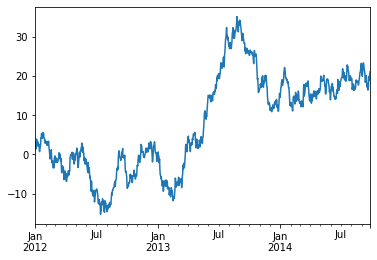

In [233]:
ts.plot()

In [234]:
df=pd.DataFrame(np.random.randn(1000,4),index=ts.index,columns=list('ABCD'))

In [235]:
df=df.cumsum()

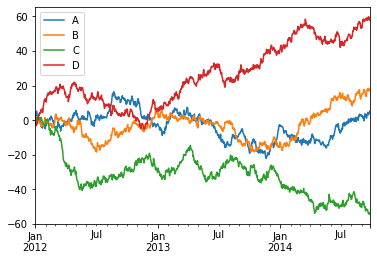

In [239]:
df.plot()
plt.legend(loc='best')

In [240]:
df.to_csv('foo.csv')

In [243]:
pd.read_csv('countries.csv').head(3)

,country,year,population
0,Afghanistan,1952,8425333
1,Afghanistan,1957,9240934
2,Afghanistan,1962,10267083


In [4]:
train=pd.read_csv('train_kOBLwZA.csv')

In [5]:
test=pd.read_csv('test_t02dQwI.csv')

In [6]:
pd.read_csv('train_kOBLwZA.csv')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [15]:
pd.read_csv('test_t02dQwI.csv')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [8]:
test_Item_Identifier=test['Item_Identifier']

In [10]:
test_Outlet_Identifier=test['Outlet_Identifier']

In [11]:
sales=train['Item_Outlet_Sales']

In [12]:
train.drop(['Item_Outlet_Sales'],axis=1,inplace=True)

In [16]:
combi=train.append(test,ignore_index=True)

In [17]:
combi.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [19]:
combi['Item_Weight'].fillna(combi['Item_Weight'].mean(),inplace=True)

In [20]:
combi['Outlet_Size'].fillna('missing',inplace=True)

In [21]:
combi['Item_Fat_Content'].value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [22]:
fat_content_dict={'Low Fat':0,'Regular':1,'LF':0,'reg':1,'low fat':0}

In [23]:
combi['Item_Fat_Content']=combi['Item_Fat_Content'].replace(fat_content_dict,regex=True)

In [24]:
combi['id']=combi['Item_Identifier']+combi['Outlet_Identifier']

In [25]:
combi.drop(['Item_Identifier'],axis=1,inplace=True)

In [26]:
es=ft.EntitySet(id='sales')

In [28]:
es.entity_from_dataframe(entity_id='bigmart',dataframe=combi,index='id')

Entityset: sales
  Entities:
    bigmart [Rows: 14204, Columns: 11]
  Relationships:
    No relationships

In [31]:
es.normalize_entity(base_entity_id='bigmart',new_entity_id='outlet',index='Outlet_Identifier',
additional_variables=['Outlet_Establishment_Year','Outlet_Size','Outlet_Location_Type','Outlet_Type'])

Entityset: sales
  Entities:
    bigmart [Rows: 14204, Columns: 7]
    outlet [Rows: 10, Columns: 5]
  Relationships:
    bigmart.Outlet_Identifier -> outlet.Outlet_Identifier

In [32]:
feature_matrix,feature_names=ft.dfs(entityset=es,
target_entity='bigmart',
max_depth=2,
verbose=1,
n_jobs=3)

Built 37 features
EntitySet scattered to workers in 10.977 seconds
Elapsed: 00:02 | Remaining: 00:00 | Progress: 100%|██████████| Calculated: 11/11 chunks


In [33]:
feature_matrix.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'outlet.Outlet_Establishment_Year',
       'outlet.Outlet_Size', 'outlet.Outlet_Location_Type',
       'outlet.Outlet_Type', 'outlet.SUM(bigmart.Item_Weight)',
       'outlet.SUM(bigmart.Item_Fat_Content)',
       'outlet.SUM(bigmart.Item_Visibility)', 'outlet.SUM(bigmart.Item_MRP)',
       'outlet.STD(bigmart.Item_Weight)',
       'outlet.STD(bigmart.Item_Fat_Content)',
       'outlet.STD(bigmart.Item_Visibility)', 'outlet.STD(bigmart.Item_MRP)',
       'outlet.MAX(bigmart.Item_Weight)',
       'outlet.MAX(bigmart.Item_Fat_Content)',
       'outlet.MAX(bigmart.Item_Visibility)', 'outlet.MAX(bigmart.Item_MRP)',
       'outlet.SKEW(bigmart.Item_Weight)',
       'outlet.SKEW(bigmart.Item_Fat_Content)',
       'outlet.SKEW(bigmart.Item_Visibility)', 'outlet.SKEW(bigmart.Item_MRP)',
       'outlet.MIN(bigmart.Item_Weight)',
       'outlet.MIN(bigmart.Item_Fat_Content)',
       

In [34]:
feature_matrix.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,outlet.Outlet_Establishment_Year,outlet.Outlet_Size,outlet.Outlet_Location_Type,outlet.Outlet_Type,...,outlet.MIN(bigmart.Item_Fat_Content),outlet.MIN(bigmart.Item_Visibility),outlet.MIN(bigmart.Item_MRP),outlet.MEAN(bigmart.Item_Weight),outlet.MEAN(bigmart.Item_Fat_Content),outlet.MEAN(bigmart.Item_Visibility),outlet.MEAN(bigmart.Item_MRP),outlet.COUNT(bigmart),outlet.NUM_UNIQUE(bigmart.Item_Type),outlet.MODE(bigmart.Item_Type)
id,,,,,,,,,,,,,,,,,,,,,
DRA12OUT010,11.600000,0,0.068535,Soft Drinks,143.0154,OUT010,1998,missing,Tier 3,Grocery Store,...,0,0.0,32.6558,12.722870,0.356757,0.101939,141.159742,925,16,Fruits and Vegetables
DRA12OUT013,11.600000,0,0.040912,Soft Drinks,142.3154,OUT013,1987,High,Tier 3,Supermarket Type1,...,0,0.0,31.4900,12.788139,0.353509,0.060242,141.128428,1553,16,Fruits and Vegetables
DRA12OUT017,11.600000,0,0.041178,Soft Drinks,140.3154,OUT017,2007,missing,Tier 2,Supermarket Type1,...,0,0.0,32.0900,12.782080,0.352560,0.061142,140.998931,1543,16,Snack Foods
DRA12OUT018,11.600000,0,0.041113,Soft Drinks,142.0154,OUT018,2009,Medium,Tier 3,Supermarket Type2,...,0,0.0,31.8900,12.803638,0.353816,0.059976,141.000899,1546,16,Fruits and Vegetables
DRA12OUT027,12.792854,0,0.040748,Soft Drinks,140.0154,OUT027,1985,Medium,Tier 3,Supermarket Type3,...,0,0.0,31.2900,12.792854,0.353432,0.060344,141.012347,1559,16,Fruits and Vegetables


In [35]:
feature_matrix=feature_matrix.reindex(index=combi['id'])

In [36]:
feature_matrix=feature_matrix.reset_index()

In [14]:
output=pd.read_csv("test_t02dQwI.csv")

In [15]:
input=pd.read_csv('train_kOBLwZA.csv')

In [18]:
input['Item_Weight']='red'

In [19]:
output['Item_Weight']='white'

In [32]:
input['Outlet_Size']=input['Item_Weight'].apply(lambda x: 'NaN'
                                             if x[1:5] else 'small'
                                                 if x <= 7 else 'medium')

In [27]:
input['Outlet_Size']=pd.Categorical(input['Outlet_Size'],categories=['NaN','small','medium'])

In [33]:
output['Outlet_Size']=output['Item_Weight'].apply(lambda x: 'NaN'
                                             if x[1:5] else 'small'
                                                 if x <= 7 else 'medium')

In [34]:
output['Outlet_Size']=pd.Categorical(output['Outlet_Size'],categories=['NaN','small','medium'])

In [37]:
input_output=pd.concat([input,output],sort=True)

In [38]:
input_output=input_output.sample(frac=1,random_state=42).reset_index(drop=True)

In [39]:
input_output.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type
0,Regular,FDT51,111.4544,NaN,Meat,0.010866,white,1985,OUT027,Tier 3,NaN,Supermarket Type3
1,Low Fat,FDB27,196.8768,1182.4608,Dairy,0.055476,red,1999,OUT049,Tier 1,NaN,Supermarket Type1
2,Low Fat,NCB07,197.0110,NaN,Household,0.077493,white,2004,OUT035,Tier 2,NaN,Supermarket Type1
3,Regular,FDY39,182.0608,7717.9536,Meat,0.000000,red,1985,OUT027,Tier 3,NaN,Supermarket Type3
4,Regular,DRA59,184.3924,NaN,Soft Drinks,0.128187,white,2002,OUT045,Tier 2,NaN,Supermarket Type1


In [46]:
subset_attributes=['Item_Fat_Content','Item_Identifier','Item_MRP','Item_Type','Item_Visibility','Item_Weight','Outlet_Establishment_Year','Outlet_Identifier','Outlet_Location_Type','Outlet_Size','Outlet_Type']

In [47]:
ip=round(input[subset_attributes].describe(),2)

In [48]:
op=round(output[subset_attributes].describe(),2)

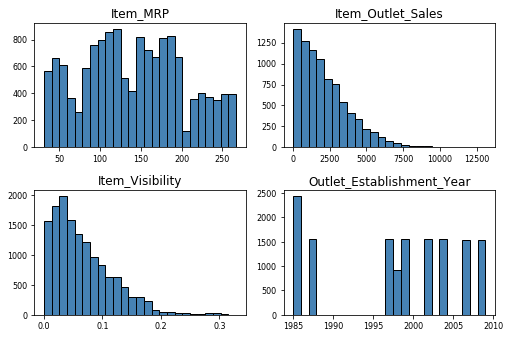

In [62]:
input_output.hist(bins=25,color='steelblue',edgecolor='black',linewidth=1.0,xlabelsize=8,ylabelsize=8,grid=False)
plt.tight_layout(rect=(0,0,1.2,1.2))

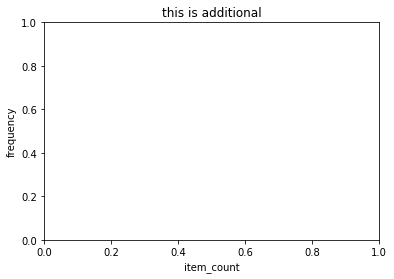

In [65]:
freq,bins,patches=ax.hist(input_output['Item_MRP'],bins=15,color='black',edgecolor='blue',linewidth=1.0)
plt.title('this is additional')
plt.xlabel('item_count')
plt.ylabel('frequency')
plt.show()

Text(0, 0.5, 'frequency')

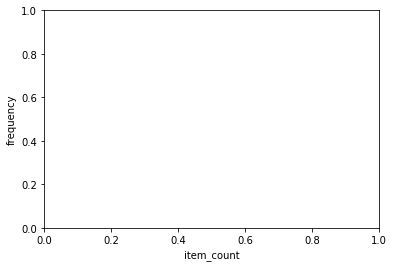

In [58]:
fig=plt.figure(figsize=(6,4))
ax=fig.add_subplot(1,1,1)
ax.set_xlabel('item_count')
ax.set_ylabel('frequency')